CRTL + [ compacta as celulas, é possivel navegar pelos indices

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#Dados
execute para ler e preparar a base de dados

## Renda de trabalhadores

https://archive.ics.uci.edu/ml/datasets/Adult

In [4]:
diretorio = '/content/drive/MyDrive/AM1/'

In [5]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','anual-income']
df = pd.read_csv(diretorio+"dados/adult.data",sep=',',names=columns)

In [ ]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','anual-income']
df = pd.read_csv("adult.data",sep=',',names=columns)

categoricals = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
numericals = ['age','capital-gain','capital-loss','hours-per-week']

###análise exploratoria

In [ ]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,anual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


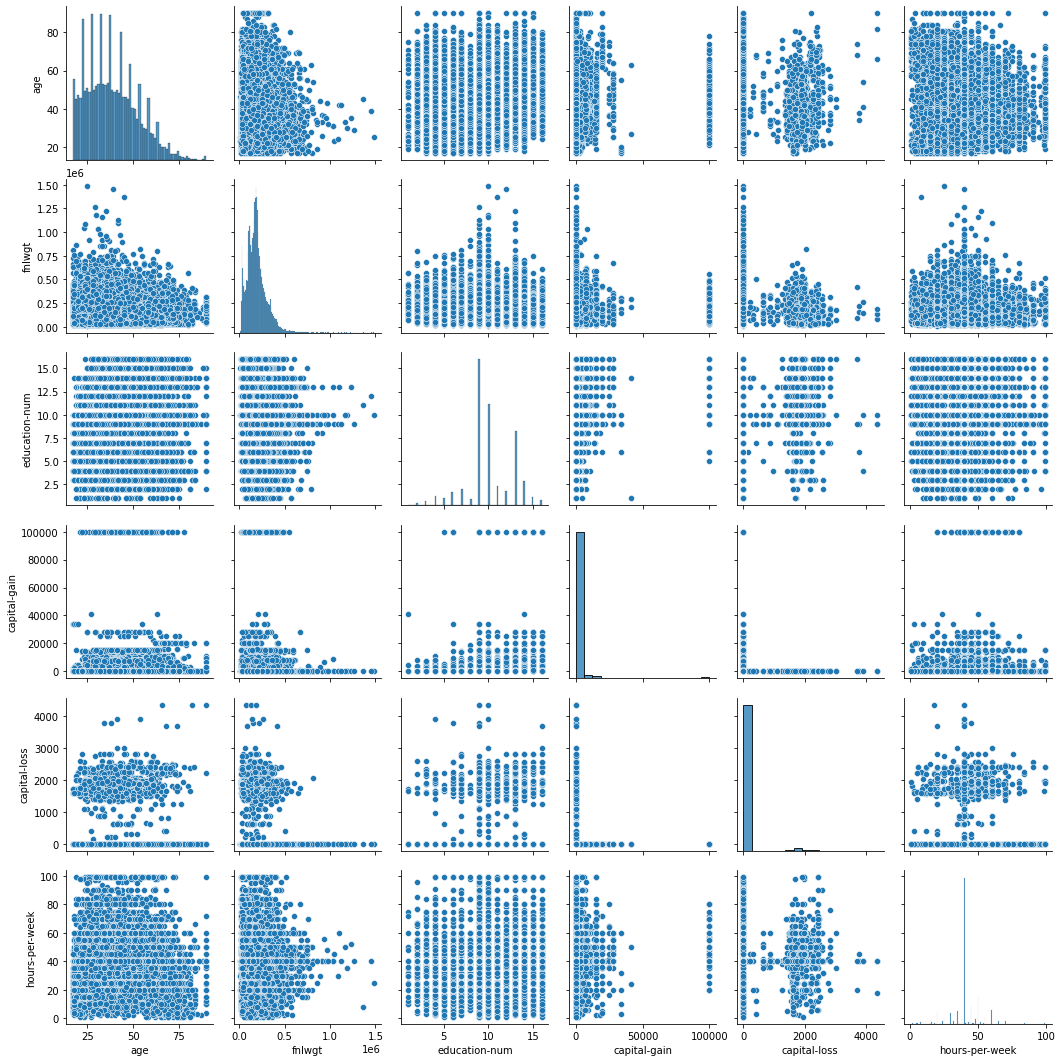

In [ ]:
sns.pairplot(df)

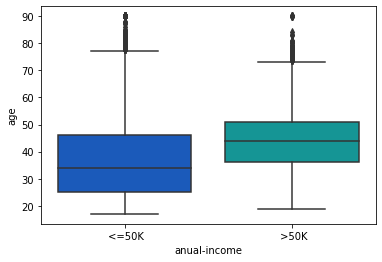

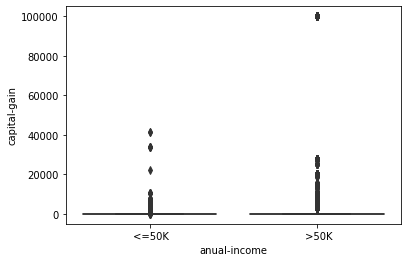

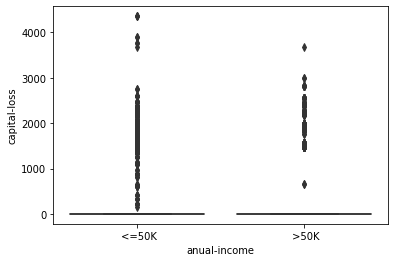

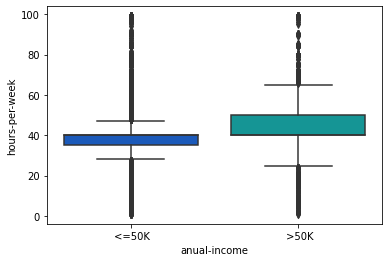

In [ ]:
# plt.figure(figsize=(12, 7))
for col in numericals:
    sns.boxplot(data=df,x='anual-income',y=col,palette='winter',orient='v')
    plt.show()

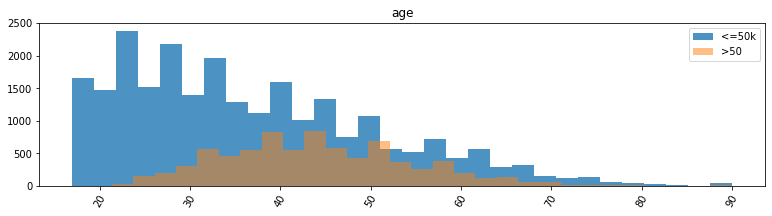

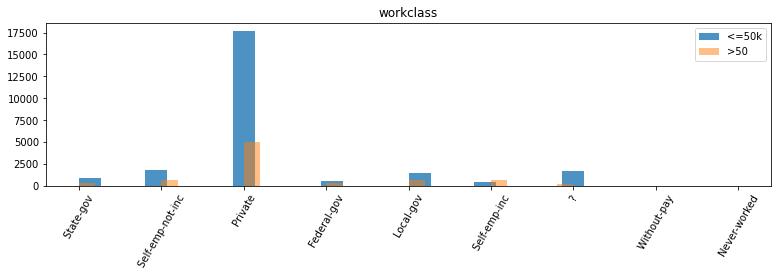

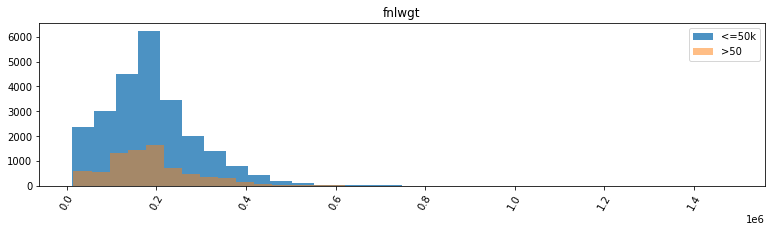

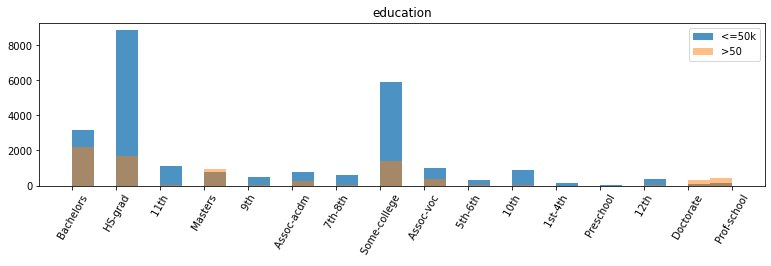

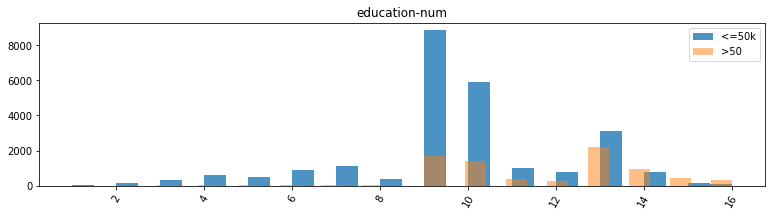

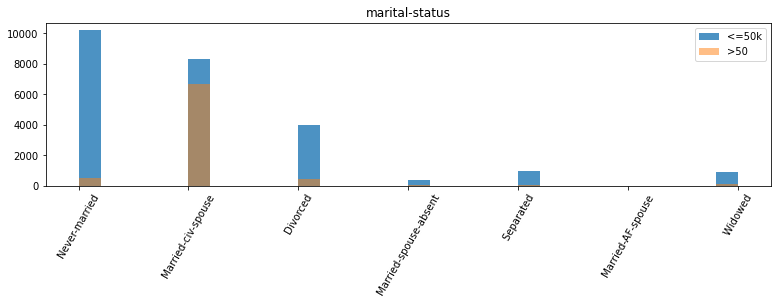

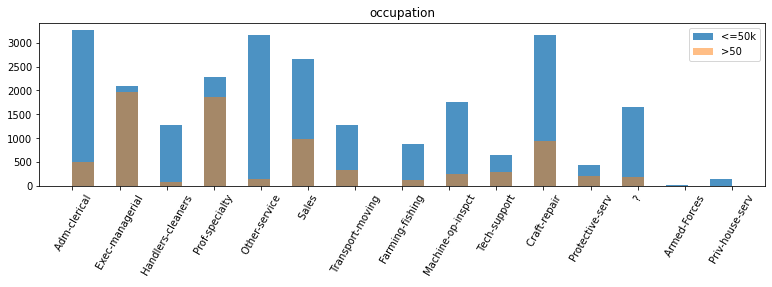

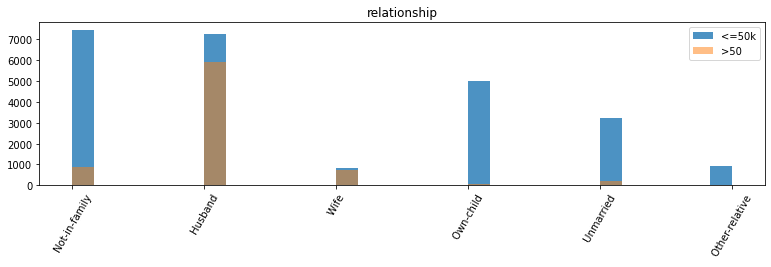

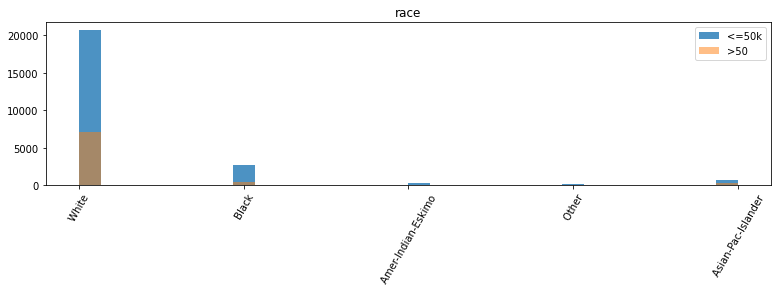

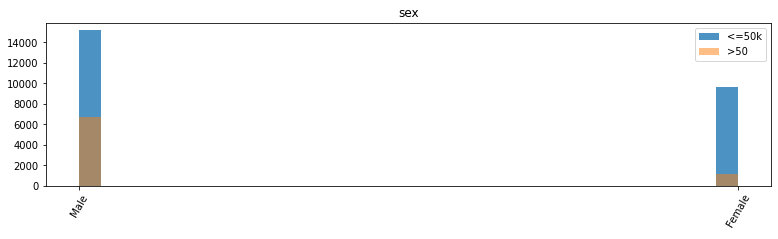

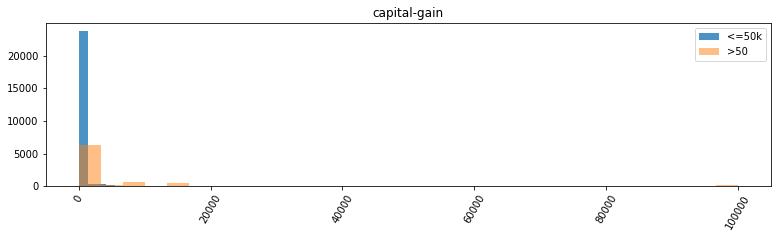

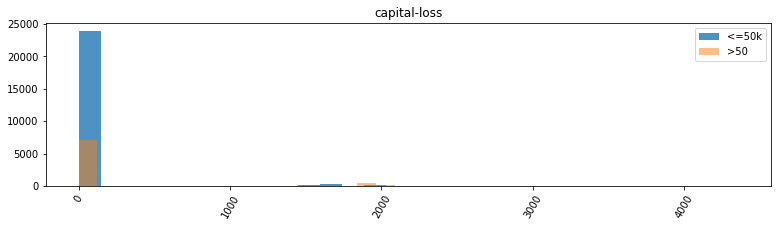

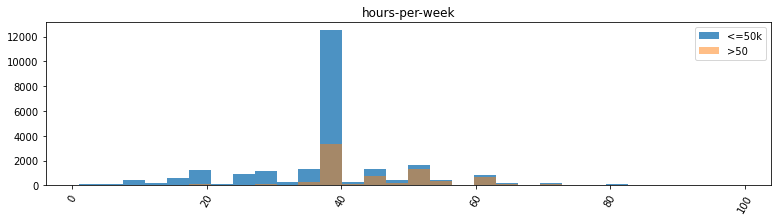

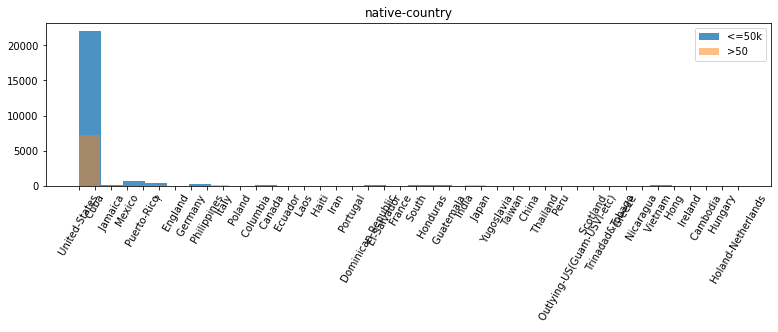

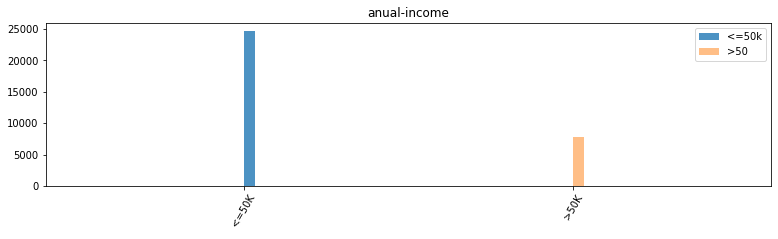

In [ ]:
# hist = ['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex']
hist = df.columns

for col in hist:
# col = 'sex'    
    plt.figure(figsize=(13,3))
    plt.title(col)
    plt.hist(df.loc[(df['anual-income']==' <=50K')][col],alpha=.8, label='<=50k',bins=30) # azul
    plt.hist(df.loc[(df['anual-income']==' >50K')][col],alpha=0.5, label='>50',bins=30), #laranja
    
    plt.legend(loc='upper right')
    plt.xticks(rotation= 60)
    plt.show()


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'anual-income'],
      dtype='object')

não automatizei a escolha dos bins, então pra salvar as imagens fui vendo uma a uma

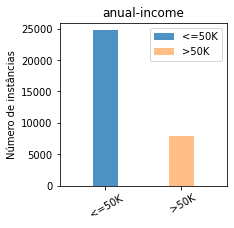

In [ ]:

col = 'anual-income'    
formato = 'pdf'

pic = diretorio +'imgs/bar '+ col +'.'+formato

bins = 3
plt.figure(figsize=(3,3))

plt.title(col)
plt.hist(df.loc[(df['anual-income']==' <=50K')][col],alpha=.8, label='<=50K',bins=bins) # azul
plt.hist(df.loc[(df['anual-income']==' >50K')][col],alpha=0.5, label='>50K',bins=bins), #laranja
plt.ylabel('Número de instâncias')
plt.legend(loc='upper right')
plt.xticks(rotation= 30)

# plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
plt.show()


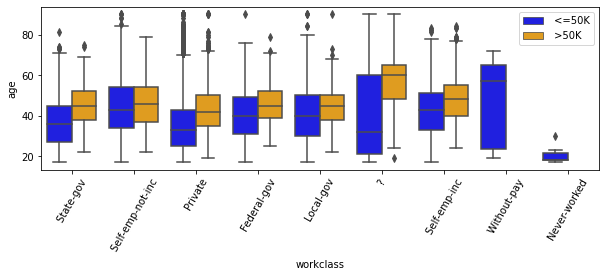

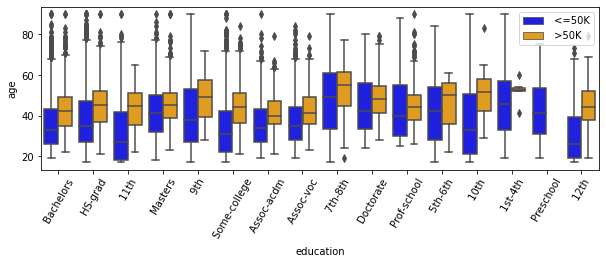

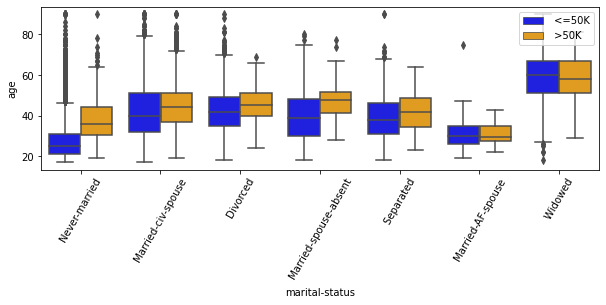

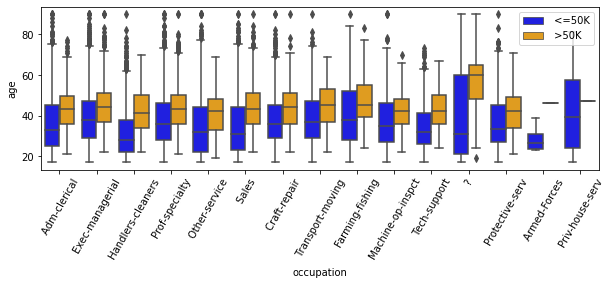

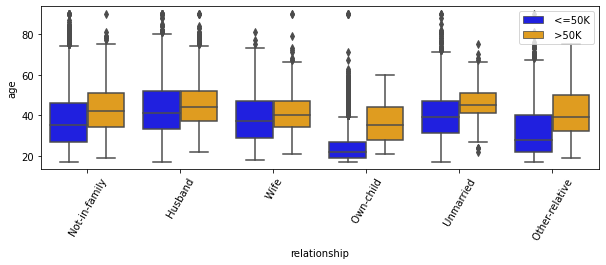

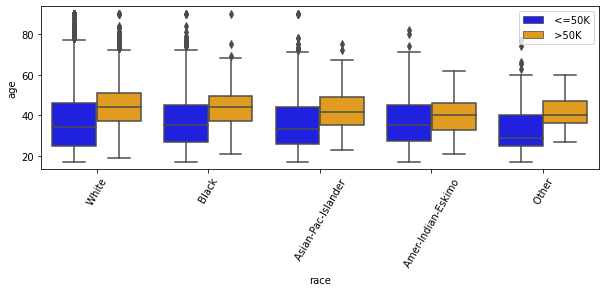

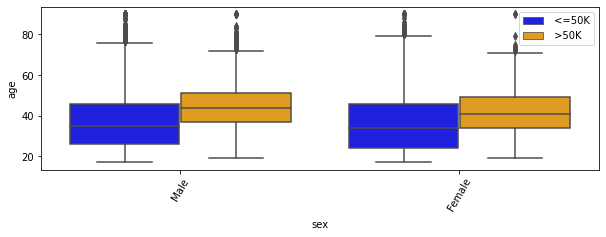

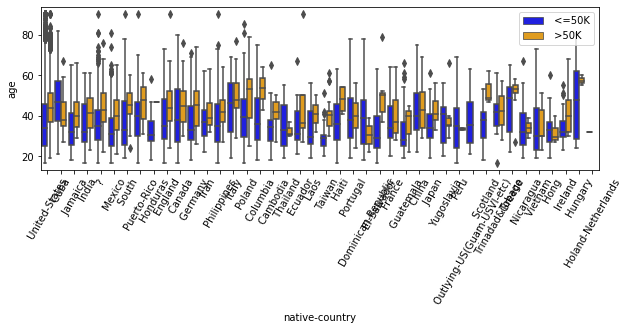

In [ ]:
cores = ['#0000FF','#FFA500']
sns.set_palette(['#0000FF','#FFA500'])	
for col in categoricals:
    plt.figure(figsize=(10, 3))
    
    plt.xticks(rotation= 60)
    sns.boxplot(data=df,x=col,y='age',orient='v',hue='anual-income', )
    plt.legend(loc='upper right')
    pic = diretorio+'imgs/box '+col+'Xage.pdf'
    # plt.savefig(pic, format="pdf",transparent=True, bbox_inches='tight')
    plt.show()


In [ ]:
(df.values == 39).sum()

854

In [ ]:
print((df['anual-income'].values == ' <=50K').sum())
print((df['anual-income'].values == ' >50K').sum())
print((df['anual-income'].values == ' <=50K').sum() / ((df['anual-income'].values == ' <=50K').sum()+(df['anual-income'].values == ' >50K').sum()))
print((df['anual-income'].values == ' >50K').sum() / ((df['anual-income'].values == ' <=50K').sum()+(df['anual-income'].values == ' >50K').sum()))

24720
7841
0.7591904425539756
0.2408095574460244


In [ ]:
(df.loc[(df['anual-income']==' <=50K')]).head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,anual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


###Divisão, preparação, codificação

In [ ]:
df.dropna(inplace=True)
try:
    df.drop(['fnlwgt','education-num'],inplace=True,axis=1)
except:
    print('já foi deletado')

In [ ]:
try:
    classe = df['anual-income']
    df.drop(axis=1,columns = ['anual-income'], inplace=True)
except:
    print('split já feito')

In [ ]:
CT_genteGrande = make_column_transformer(
    (OneHotEncoder(), categoricals),
    (StandardScaler(), numericals),
    remainder='passthrough'
)
LE_genteGrande = LabelEncoder()

X_train = CT_genteGrande.fit_transform(df)
y_train = LE_genteGrande.fit_transform(classe)

In [6]:
df2 = pd.read_csv(diretorio+"dados/adult.test",sep=',',names=columns,skiprows=[0])
df2.dropna(inplace=True)
try:
    df2.drop(['fnlwgt','education-num'],inplace=True,axis=1)
except:
    print('colunas n usadas já apagadas')
df2['anual-income'] = df2['anual-income'].str[:-1]
try:
    classe2 = df2['anual-income']
    df2.drop(axis=1,columns = ['anual-income'], inplace=True)
except:
    print('a classe e os dados já estão separados')

In [ ]:
X_test = CT_genteGrande.transform(df2)
y_test = LE_genteGrande.transform(classe2)

# MODELOS

## Arvore de decisão

### modelo cru

In [ ]:
modelo1 = DecisionTreeClassifier()
modelo1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

pred1 = modelo1.predict(X_test)
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     12435
           1       0.62      0.59      0.61      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.74      0.74     16281
weighted avg       0.82      0.82      0.82     16281

[[11037  1398]
 [ 1566  2280]]


### modelo com otimização de parametros

In [ ]:
distributions = dict(criterion = ["gini", "entropy"],
                     splitter = ['best', 'random'],
                     max_depth = range(1,12),
                     min_samples_split = range(2,5),
                     max_leaf_nodes = range(2,200,10)
                    )
otimizador1 = RandomizedSearchCV(modelo1, distributions, cv = 10, scoring = 'accuracy')
otimizador1.fit(X_train,y_train)
melhorArvore = otimizador1.best_estimator_


In [ ]:
pred1 = melhorArvore.predict(X_test)
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.76      0.59      0.66      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

[[11732   703]
 [ 1585  2261]]


###Visualização do modelo

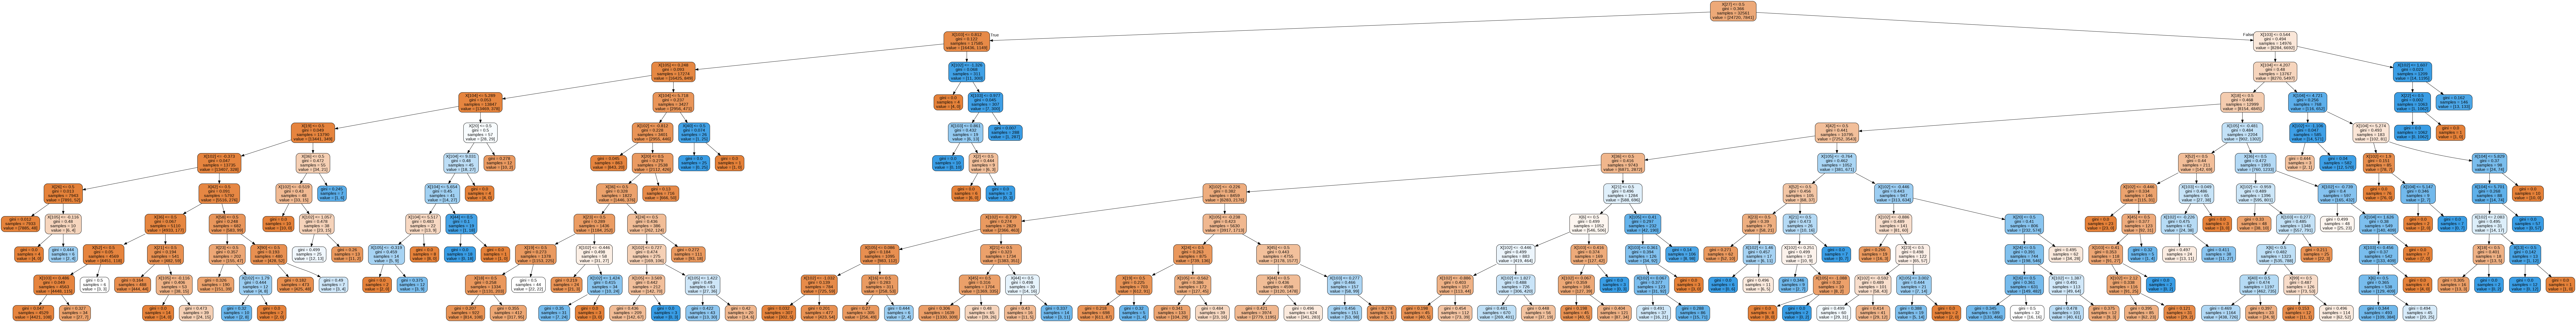

In [ ]:
dot_data = StringIO()  
export_graphviz(melhorArvore, out_file=dot_data,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

##SVM

###Modelo cru

In [ ]:
modelo2 = SVC()
modelo2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred2 = modelo2.predict(X_test)
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.75      0.59      0.66      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

[[11680   755]
 [ 1566  2280]]


###Modelo com otimização de parametros

In [ ]:
distributions = dict(
                    #  kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
                     degree = range(1,3),
                     gamma = ['scale', 'auto' ],
                    )
otimizador2 = RandomizedSearchCV(modelo2, distributions, cv = 10, scoring = 'accuracy', random_state=42)
otimizador2.fit(X_train,y_train)
melhorSvm = otimizador2.best_estimator_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
pred2 = melhorSvm.predict(X_test)
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.75      0.59      0.66      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281

[[11680   755]
 [ 1566  2280]]


## log reg
válido apenas para problemas com duas classes

In [ ]:
modelo3 = LogisticRegression(max_iter= X_train.shape[0])
modelo3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=32561,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred3 = modelo3.predict(X_test)
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281

[[11585   850]
 [ 1553  2293]]
